In [1]:
import torch
import requests
from PIL import Image, ImageDraw, ImageFont
import torchvision.transforms as T

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

In [3]:
model = torch.hub.load('facebookresearch/detr','detr_resnet101',pretrained = True)
model.eval().to(device)

Downloading: "https://github.com/facebookresearch/detr/zipball/main" to /home/alexander/.cache/torch/hub/main.zip
/home/alexander/Documents/Programming/ObjectDetection/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/alexander/Documents/Programming/ObjectDetection/.venv/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /home/alexander/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 1

DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
      )
    )
    (decoder): TransformerDecoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerDecoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, ou

In [10]:
# url = input()
# img = Image.open(requests.get(url, stream=False).raw).resize((800,600))

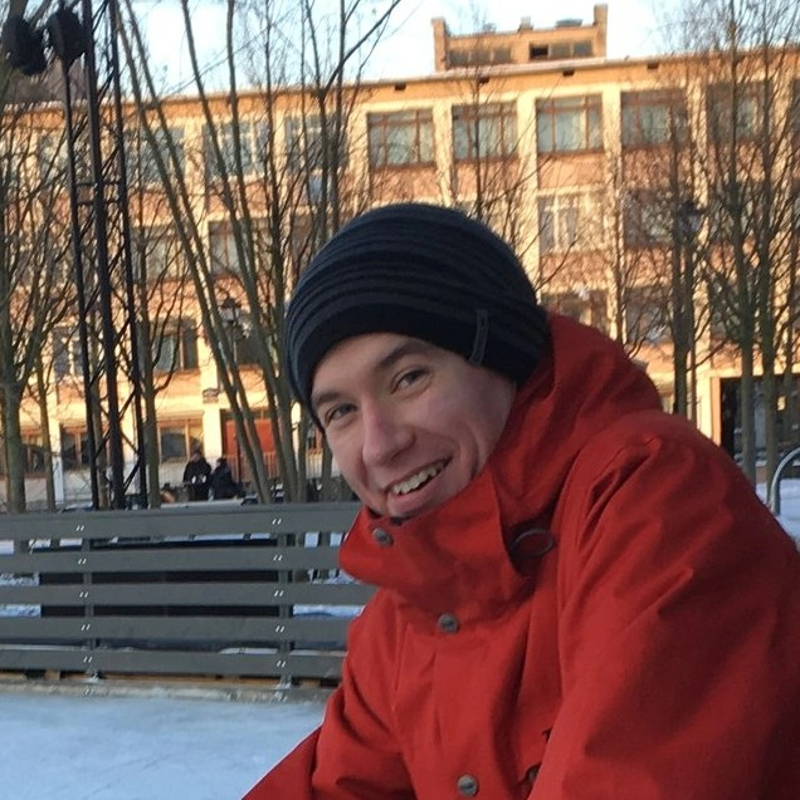

In [14]:
path = '../data/images/0je5b4V4MQ0_1.jpg'
img = Image.open(path).resize((800,800))
img

In [8]:
# These are the COCO classes
CLASSES = [
    'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
    'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
    'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
    'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
    'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
    'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
    'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
    'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
    'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
    'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
    'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
    'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
    'toothbrush'
]

# Detectron2 uses a different numbering scheme, we build a conversion table
# coco2d2 = {}
# count = 0
# for i, c in enumerate(CLASSES):
#   if c != "N/A":
#     coco2d2[i] = count
#     count+=1

# standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.Resize(800),
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])


In [9]:
print(transform(img).unsqueeze(0).size())
img_tens = transform(img).unsqueeze(0).to(device)

torch.Size([1, 3, 800, 800])


In [21]:
with torch.no_grad():
    output = model(img_tens)

output

{'pred_logits': tensor([[[-15.4684,   4.4305,  -2.9028,  ..., -11.0858,  -6.8966,   8.1322],
          [-17.1312,   1.2615,  -1.9760,  ..., -13.7885, -12.4663,   9.7440],
          [-16.4255,   5.5346,  -1.0230,  ..., -10.6181,  -7.3673,   9.0277],
          ...,
          [-14.4596,   2.2029,   1.7213,  ...,  -9.1699,  -9.9710,   6.4842],
          [-14.4293,   2.2417,   1.7309,  ...,  -9.5728, -10.3263,   6.3764],
          [-13.9697,   3.9364,  -1.0293,  ..., -11.1239,  -8.3082,   7.2754]]]),
 'pred_boxes': tensor([[[2.2034e-01, 6.1824e-01, 1.9352e-02, 2.5447e-02],
          [4.0095e-01, 7.5512e-01, 1.3404e-01, 1.6755e-01],
          [2.2738e-01, 6.0387e-01, 2.2615e-02, 5.0810e-02],
          [9.8526e-01, 8.5788e-01, 2.9401e-02, 2.8384e-01],
          [9.9242e-01, 9.0690e-01, 1.5164e-02, 1.8368e-01],
          [5.3326e-01, 6.2545e-01, 9.1901e-01, 7.5086e-01],
          [9.9600e-01, 7.0399e-01, 7.9087e-03, 3.9522e-01],
          [2.2793e-01, 6.9287e-01, 4.5596e-01, 1.1375e-01],
     

In [19]:
img2 = img.copy()
draw = ImageDraw.Draw(img2)

print(output['pred_boxes'][0].shape)
print(output['pred_logits'][0].argmax(-1))

for logits, box in zip(output['pred_logits'][0], output['pred_boxes'][0]):
    cls = logits.argmax()
    if cls >= len(CLASSES):
        continue
    label = CLASSES[cls]
    if label == 'person':
        box = box.cpu() * torch.Tensor([800,800,800,800])
        x, y, w, h = box
        x0, x1 = x - w//2, x + w//2
        y0, y1 = y - h//2, y + h//2
        draw.rectangle([x0, y0, x1, y1], outline='blue', width=2)
        draw.text((x0+5, y0+2), label, fill='red')

torch.Size([100, 4])
tensor([91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 15, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91, 91,  1, 91, 91, 91, 91, 91,  1, 91, 91, 91,
        91, 91, 91, 91, 91, 91, 91,  1, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91,
        91, 91, 91, 91, 91,  1, 91, 91, 91, 91])


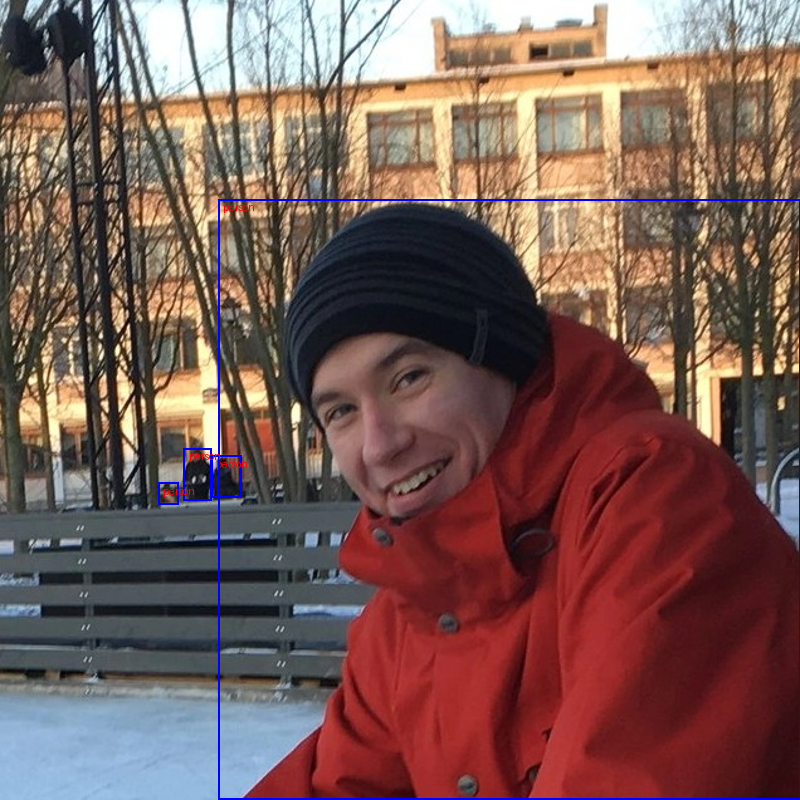

In [20]:
img2